# Traffic Police Stops Project

## Table of Contents:
* [Goal](#goal)
* [Data Preprocessing](#predata)
    * [Importing the Libraries](#library)
    * [Reading and Viewing the Dataset](#dataset)
    * [Detecting Missing Values](#missing)
    * [Adjusting columns and rows](#colandrow)
* [Role of Gender in Traffic Stops](#gender)
    * [Examining Traffic Violations](#violations)
    * [Comparing Violations by Gender](#violationsbygender)
    * [Comparing Speeding Outcomes by Gender](#speedingbygender)
    * [Calculating the Search Rate](#searchrate)
    * [Comparing Search Rates by Gender](#searchratebygender)
    * [Adding a Second Factor to the Analysis](#secondfactor)
    * [Counting Protective Frisks](#frisk)
    * [Comparing Frisk Rates by Gender](#friskbygender)
* [Are people more likely to get arrested at a certain time of the day?](#uhrzeit)
    * [Calculating the Hourly Arrest Rate](#hourlyarrestrate)
    * [Plotting the Hourly Arrest Rate](#hourlyarrestrateplot)
* [Drug-Related Stops](#drug)
    * [Plotting Drug-Related Stops](#drugstops)
    * [Comparing Drug and Search Rates](#drugandsearchrate)
* [Police District Comparison](#district)
    * [Plotting Violations by District](#districtplot)
* [Stop Length](#stoplength)
    * [Plotting Stop Length](#stoplengthplot)
* [Impact of Weather Conditions on Police Behavior](#weather)
    * [Plotting the Temperature](#tempplot)
    * [Plotting the Temperature Difference](#tempplotdiff)
    * [Counting Bad Weather Conditions](#badweather)
    * [Rating the Weather Conditions](#ratingweather)
    * [Comparing Arrest Rates by Weather Rating](#weatherandarrestrate)
        * [Preparing the DataFrames](#dfprep)
        * [Merging the DataFrames](#dfmerge)
* [Summary](#summary)
    * [Conclusion](#conc)

## Goal <a class="anchor" id="goal"></a>

We are going to be analyzing a dataset of traffic stops in Rhode Island that was collected by the Standford Open Policing Project. We aim to explore the relationship between certain features of our dataset such as gender, weather conditions, violations and conducted searches.

## Dataset <a class="anchor" id="predata"></a>

### Importing the Libraries <a class="anchor" id="library"></a>

In [2]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Reading and Viewing the Dataset <a class="anchor" id="dataset"></a>

In [3]:
df = pd.read_csv("police.csv")                            # retrieving the dataset

In [4]:
df.columns

Index(['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_name',
       'county_fips', 'fine_grained_location', 'police_department',
       'driver_gender', 'driver_age_raw', 'driver_age', 'driver_race_raw',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type_raw', 'search_type', 'contraband_found', 'stop_outcome',
       'is_arrested', 'stop_duration', 'out_of_state', 'drugs_related_stop',
       'district'],
      dtype='object')

In [5]:
df.head()                                                 # observing first 5 rows

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [6]:
df.tail()                                                # observing last 5 rows

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
509676,RI-NA-06,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509677,RI-NA-07,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509678,RI-NA-08,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509679,RI-NA-09,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA
509680,RI-NA-10,RI,NaN,NaN,Zone NA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone NA


### Detecting Missing Values <a class="anchor" id="missing"></a>

In [7]:
df.isnull().sum()

id                            0
state                         0
stop_date                    10
stop_time                    10
location_raw                  0
county_name              509681
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

### Adjusting Columns and Rows <a class="anchor" id="colandrow"></a>

The feature that indicates the gender of drivers will be critical to our analysis. As we've seen previously, only a small fraction of rows are missing from mentioned columns. We are going to drop these rows from the dataset

In [8]:
df.shape                                                      # checking dimensions before dropping

(509681, 26)

In [9]:
df.drop(['county_name','state'], axis=1, inplace=True)

In [10]:
df.shape                                                      # rechecking dimensions

(509681, 24)

In [11]:
df.isnull().sum()                                             # counting the number of missing values again

id                            0
stop_date                    10
stop_time                    10
location_raw                  0
county_fips              509681
fine_grained_location    509681
police_department            10
driver_gender             29097
driver_age_raw            29049
driver_age                30695
driver_race_raw           29073
driver_race               29073
violation_raw             29073
violation                 29073
search_conducted             10
search_type_raw          491919
search_type              491919
contraband_found              0
stop_outcome              29073
is_arrested               29073
stop_duration             29073
out_of_state              29881
drugs_related_stop            0
district                      0
dtype: int64

In [12]:
df.dropna(subset=['driver_gender'], axis=0, inplace=True)

In [13]:
df.shape                                                      # checking dimensions after dropping

(480584, 24)

***

The ``is_arrested`` column currently has the object data type. In order for us to perform mathematical operations on it, we are going to change the data type to boolean.

In [14]:
df.dtypes                                                     # data types of the columns

id                        object
stop_date                 object
stop_time                 object
location_raw              object
county_fips              float64
fine_grained_location    float64
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted          object
search_type_raw           object
search_type               object
contraband_found            bool
stop_outcome              object
is_arrested               object
stop_duration             object
out_of_state              object
drugs_related_stop          bool
district                  object
dtype: object

In [15]:
df['is_arrested'] = df['is_arrested'].astype(dtype=bool)     # changing the data type of df['is_arrested']

In [16]:
df['is_arrested'].dtype                                      # checking the data dtype of df['is_arrested']

dtype('bool')

***

The date and time of each traffic stops are currently stored in separate object columns: ``stop_date`` and ``stop_time``. We are going to combine these two columns into a single column and convert it to ``datetime`` format which will enable convenient date attributes that we are going to utilize for our analysis.

In [17]:
df['combined'] = df.stop_date.str.cat(df.stop_time, sep=' ') # combining df['stop_date'] and df['stop_time']

In [18]:
df['stop_datetime'] = df.combined.astype(dtype='datetime64') # changing the data type

In [19]:
df.dtypes                                                    # checking the data type

id                               object
stop_date                        object
stop_time                        object
location_raw                     object
county_fips                     float64
fine_grained_location           float64
police_department                object
driver_gender                    object
driver_age_raw                  float64
driver_age                      float64
driver_race_raw                  object
driver_race                      object
violation_raw                    object
violation                        object
search_conducted                 object
search_type_raw                  object
search_type                      object
contraband_found                   bool
stop_outcome                     object
is_arrested                        bool
stop_duration                    object
out_of_state                     object
drugs_related_stop                 bool
district                         object
combined                         object


***

Now that we combined date and time into a new column, we are going to set it as the new index of our data frame. This is going to allow us to analyze the dataset by date and time.

In [20]:
df.set_index('stop_datetime', inplace=True)                  # setting df['stop_datetime'] as index

In [21]:
df.index                                                     # checking the index

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-02 20:30:00',
               '2005-01-04 12:55:00', '2005-01-06 01:30:00',
               '2005-01-12 08:05:00', '2005-01-18 08:15:00',
               '2005-01-18 17:13:00', '2005-01-23 23:15:00',
               '2005-01-24 20:32:00', '2005-02-09 03:05:00',
               ...
               '2015-12-31 22:10:00', '2015-12-31 22:14:00',
               '2015-12-31 22:26:00', '2015-12-31 22:38:00',
               '2015-12-31 22:39:00', '2015-12-31 22:46:00',
               '2015-12-31 22:47:00', '2015-12-31 23:08:00',
               '2015-12-31 23:44:00', '2015-12-31 23:48:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=480584, freq=None)

***

## Role of Gender in Traffic Stops <a class="anchor" id="gender"></a>

In this part of our analysis, we are going to be exploring whether gender of a driver has an impact on police behavior during a traffic stop.

### Examining Traffic Violations <a class="anchor" id="violations"></a>

Before comparing the violations being committed by each gender, we are going to examine the violations column to get a baseline understanding of the data

In [22]:
df.violation.value_counts()                            # violations that are being committed by all drivers

Speeding               268736
Moving violation        90228
Equipment               61250
Other                   24216
Registration/plates     19830
Seat belt               16324
Name: violation, dtype: int64

In [23]:
((df.violation.value_counts() /
  df.violation.value_counts().sum()) * 100).round()   # violation counts as proportions of the total

Speeding               56.0
Moving violation       19.0
Equipment              13.0
Other                   5.0
Registration/plates     4.0
Seat belt               3.0
Name: violation, dtype: float64

### Comparing Violations by Gender <a class="anchor" id="violationsbygender"></a>

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In [24]:
female = df[df.driver_gender == "F"]                  # creating a data frame that only contains female drivers

In [25]:
female.driver_gender.unique()                         # checking the gender

array(['F'], dtype=object)

In [26]:
male = df[df.driver_gender == "M"]                    # creating a data frame that only contains male drivers

In [27]:
male.driver_gender.unique()                           # checking the gender

array(['M'], dtype=object)

In [28]:
((female.violation.value_counts() /
  female.violation.value_counts().sum()) * 100).round()

                                                      # violations committed by female drivers as proportions

Speeding               66.0
Moving violation       14.0
Equipment              11.0
Registration/plates     4.0
Other                   3.0
Seat belt               3.0
Name: violation, dtype: float64

In [29]:
((male.violation.value_counts() / 
  male.violation.value_counts().sum()) * 100).round()

                                                     # violations committed by male drivers as proportions

Speeding               52.0
Moving violation       21.0
Equipment              14.0
Other                   6.0
Registration/plates     4.0
Seat belt               4.0
Name: violation, dtype: float64

### Comparing Speeding Outcomes by Gender <a class="anchor" id="speedingbygender"></a>

When a driver is pulled over for speeding, does the gender has an impact on whether the driver will receive a ticket or a warning?

In [30]:
female_and_speeding = female[female.violation == "Speeding"]     # female drivers stopped for speeding

In [31]:
male_and_speeding = male[male.violation == "Speeding"]           # male drivers stopped for speeding

In [32]:
((female_and_speeding.stop_outcome.value_counts() /
  female_and_speeding.stop_outcome.value_counts().sum()) * 100).round()

                                                                 # stop outcome for females

Citation            95.0
Warning              4.0
Arrest Driver        1.0
Arrest Passenger     0.0
N/D                  0.0
No Action            0.0
Name: stop_outcome, dtype: float64

In [33]:
((male_and_speeding.stop_outcome.value_counts() /
  male_and_speeding.stop_outcome.value_counts().sum()) * 100).round()

                                                                 # stop outcome for males

Citation            94.0
Warning              4.0
Arrest Driver        2.0
Arrest Passenger     0.0
N/D                  0.0
No Action            0.0
Name: stop_outcome, dtype: float64

### Calculating the Search Rate <a class="anchor" id="searchrate"></a>

During a traffic stop, the police officer sometimes conducts a search of the vehicle. We are going to calculate the percentage of all stops that result in a vehicle search, also known as the search rate.

In [34]:
df['search_conducted'] = df.search_conducted.astype(bool)      # changing the data type to boolean

In [35]:
((df.search_conducted.value_counts() /
  df.search_conducted.value_counts().sum()) * 100).round()     # calculating the search rate by counting

False    96.0
True      4.0
Name: search_conducted, dtype: float64

In [36]:
df.search_conducted.mean()                                     # calculating the search rate by taking the mean

0.036959199640437465

### Comparing Search Rates by Gender <a class="anchor" id="searchratebygender"></a>

We are going to compare the rates at which female and male drivers are searched during a traffic stop.

In [37]:
female.search_conducted.mean()                       # calculating the search rate of female drivers

0.018751239152648355

In [38]:
male.search_conducted.mean()                         # calculating the search rate of male drivers

0.04379217389811301

In [39]:
df.groupby('driver_gender').mean().search_conducted  # calculating the search rate by grouping by genders

driver_gender
F    0.018751
M    0.043792
Name: search_conducted, dtype: float64

### Adding a Second Factor to the Analysis <a class="anchor" id="secondfactor"></a>

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor. We could hypothesize that the search rate varies by violation type and the difference in search rate between males and females is because they tend to commit different violations. We are going to test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis is true, we will to see that males and females are searched at about the same rate for each violation.

In [40]:
df.groupby(['violation', 'driver_gender']).mean().search_conducted

                                    # calculating the search rate for each combination of gender and violation

violation            driver_gender
Equipment            F                0.040245
                     M                0.070916
Moving violation     F                0.038021
                     M                0.059156
Other                F                0.045898
                     M                0.046120
Registration/plates  F                0.054700
                     M                0.103589
Seat belt            F                0.017746
                     M                0.031705
Speeding             F                0.007738
                     M                0.026630
Name: search_conducted, dtype: float64

Since the search rates differ for each violation, we reject the hypothesis.

### Counting Protective Frisks <a class="anchor" id="frisk"></a>

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "Protective Frisk." We are going to check to see how many times "Protective Frisk" was the only search type.

In [41]:
df.search_type.value_counts()                               # counting the search types

Incident to Arrest                                          6998
Probable Cause                                              4989
Reasonable Suspicion                                        1141
Inventory                                                   1101
Protective Frisk                                             879
Incident to Arrest,Inventory                                 649
Incident to Arrest,Probable Cause                            552
Probable Cause,Reasonable Suspicion                          334
Probable Cause,Protective Frisk                              221
Incident to Arrest,Protective Frisk                          158
Incident to Arrest,Inventory,Probable Cause                  151
Inventory,Probable Cause                                     132
Protective Frisk,Reasonable Suspicion                         83
Incident to Arrest,Inventory,Protective Frisk                 77
Incident to Arrest,Probable Cause,Protective Frisk            74
Inventory,Protective Fris

In [42]:
df['frisk'] = df.search_type.str.contains('Protective Frisk')         

                                                             # creating a column that only contains frisks

In [43]:
df['frisk'].dtype                                            # checking the data type

dtype('O')

In [44]:
df['frisk'].sum()                                            # taking the sum of df['frisk']

1598

In [45]:
df['frisk'] = df.frisk.astype(bool)

### Comparing Frisk Rates by Gender <a class="anchor" id="friskbygender"></a>

We are going to compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

In [46]:
searched = df[df.search_conducted == True]        # creating a data frame that only contains conducted searches

In [47]:
searched['frisk'].mean()                          # percentage of searches included a frisk

0.08996734601959239

In [48]:
searched.groupby('driver_gender').mean().frisk    # frisk rate by gender

driver_gender
F    0.066694
M    0.093707
Name: frisk, dtype: float64

In [49]:
searched.groupby('driver_gender').mean().frisk.pct_change() 

                                                  # percentage difference of genders

driver_gender
F         NaN
M    0.405035
Name: frisk, dtype: float64

***

## Are people more likely to get arrested at a certain time of the day? <a class="anchor" id="uhrzeit"></a>

### Calculating the Hourly Arrest Rate  <a class="anchor" id="hourlyarrestrate"></a>

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. We are going to find out whether the arrest rate varies by the time of the day.

In [50]:
df.is_arrested.mean()                            # calculating the overall arrest rate

0.03454755048024903

In [51]:
df.groupby(df.index.hour).mean().is_arrested     # calculating the hourly arrest rate

stop_datetime
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

### Plotting the Hourly Arrest Rate <a class="anchor" id="hourlyarrestrateplot"></a>

In [52]:
hourly_arrest_rate = df.groupby(df.index.hour).mean().is_arrested

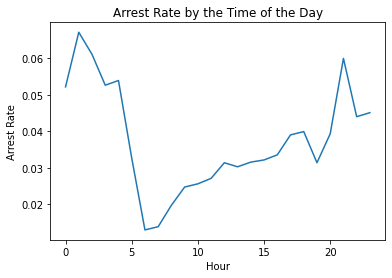

In [53]:
plt.plot(hourly_arrest_rate)

plt.xlabel('Hour')                                 # setting the x label

plt.ylabel('Arrest Rate')                          # setting the y label

plt.title('Arrest Rate by the Time of the Day')    # setting the titel

plt.show()

It can be seen that people are more likely to get arrested at night.

***

## Drug-Related Stops<a class="anchor" id="drug"></a>

### Plotting Drug-Related Stops<a class="anchor" id="drugstops"></a>

In a small portion of traffic stops, drugs are found in the vehicle during a search. We are going to assess whether these drug-related stops are becoming more common over time.

In [54]:
df.drugs_related_stop.resample("A").mean()               # calculating the annual rate of drug-relatted stops

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [55]:
annual_drug_rate = df.drugs_related_stop.resample("A").mean()

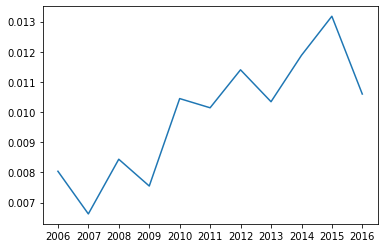

In [56]:
plt.plot(annual_drug_rate)                              # plotting annual drug rate

plt.show()

### Comparing Drug and Search Rates<a class="anchor" id="drugandsearchrate"></a>

As we saw, the rate of drug-related stops increased significantly between 2005 and 2015. We could hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We are going to test this hypothesis by calculating the annual search rate and then plotting it against the annual drug rate.

In [57]:
df.search_conducted.resample('A').mean()              # calculating the annual search rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [58]:
annual_search_rate = df.search_conducted.resample('A').mean()

In [59]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

                                                      # concatenating annual drug rate and annual search rate

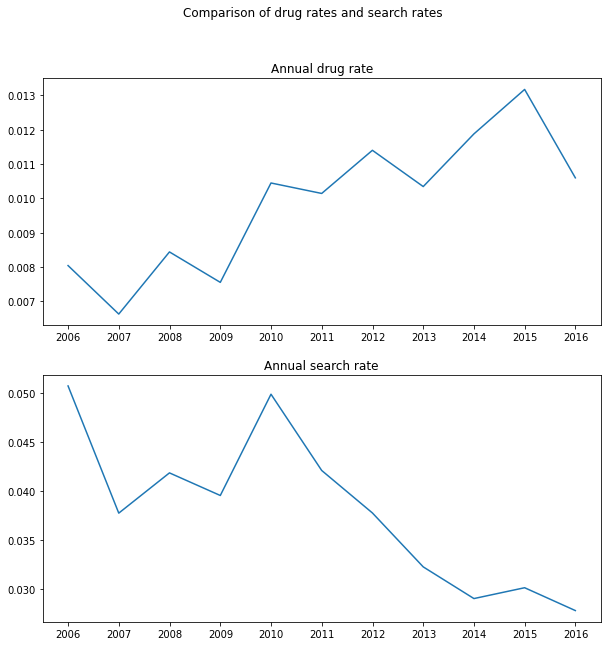

In [60]:
fig, (ax1, ax2) = plt.subplots(2)

fig.set_size_inches(10, 10)                           # setting the figure size

fig.suptitle('Comparison of drug rates and search rates')


ax1.plot(annual_drug_rate)
ax1.set_title('Annual drug rate')


ax2.plot(annual_search_rate)
ax2.set_title('Annual search rate')


plt.show()

Both annual drug rate and annual search rate are not increasing over time. Therefore we reject the hypothesis.

***

## Police District Comparison<a class="anchor" id="district"></a>

The state of Rhode Island is broken into six police districts, also known as zones. We are going to explore how the zones compare in terms of what violations are caught by police.

In [61]:
pd.crosstab(df.district, df.violation)                        # creating a frequency table

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [62]:
all_zones = pd.crosstab(df.district, df.violation)

In [63]:
all_zones.loc['Zone K1' : 'Zone K3']                         # selecting k zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [64]:
k_zones = all_zones.loc['Zone K1' : 'Zone K3']

### Plotting Violations by District <a class="anchor" id="districtplot"></a>

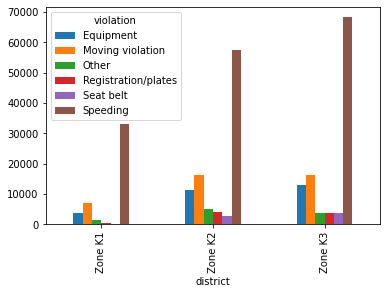

In [65]:
k_zones.plot.bar()                                           # creating a bar plot

plt.show()

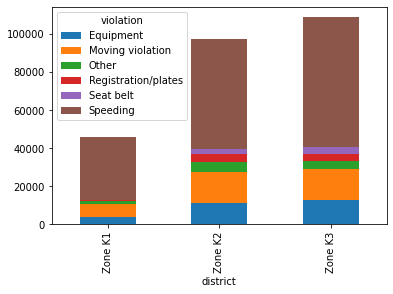

In [66]:
k_zones.plot.bar(stacked=True)                               # creating a stacked bar plot

plt.show()

***

## Stop Length <a class="anchor" id="stoplength"></a>

If you were stopped for a particular violation, how long might you expect to be detained?

In [67]:
df.stop_duration.unique()                                    # unique values in df['stop_duration']

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [68]:
mapping = {'0-15 Min' : 8,                                   # creating a mapping dictionary
           '16-30 Min' : 23,
           '30+ Min' : 45,
           '2' : 2,
           '1' : 1}

In [69]:
df['stop_minutes'] = df.stop_duration.map(mapping)           # converting strings to integers using mapping

In [70]:
df['stop_minutes'].unique()                                  # checking unique values

array([ 8, 23, 45,  2,  1], dtype=int64)

### Plotting Stop Length<a class="anchor" id="stoplengthplot"></a>

In [71]:
df.groupby('violation_raw').mean().stop_minutes      # calculating the mean number of stop lengths by violation

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454155
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.833943
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589143
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [72]:
stop_length = df.groupby('violation_raw').mean().stop_minutes

In [73]:
stop_length = stop_length.sort_values()              # sorting the values

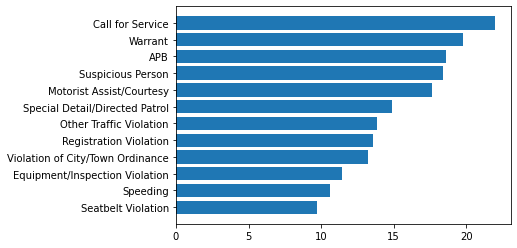

In [74]:
plt.barh(stop_length.index, stop_length)

plt.show()

***

## Impact of Weather Conditions on Police Behavior<a class="anchor" id="weather"></a>

We are going to examine the temperature columns from the weather dataset to assess whether the data seems trustworthy.

In [75]:
weather = pd.read_csv('weather.csv')                    # retrieving weather dataset

In [76]:
weather[['TMIN', 'TAVG', 'TMAX']].describe()            # descriptive statistics

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


### Plotting the Temperature<a class="anchor" id="tempplot"></a>

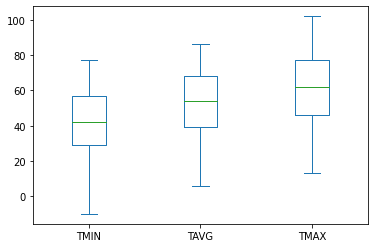

In [77]:
weather[['TMIN', 'TAVG', 'TMAX']].plot.box()            # plotting min, max and avg temperatures

plt.show()

### Plotting the Temperature Difference<a class="anchor" id="tempplotdiff"></a>

We are going to continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

In [78]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

                # creating a column that represents the difference between the maximum and minimum temperatures

In [79]:
weather.TDIFF.describe()

                # generating descriptive statistics

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

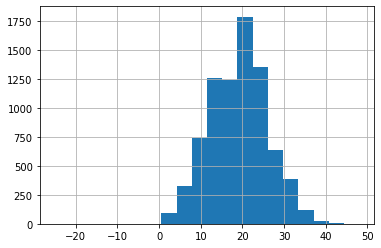

In [80]:
weather['TDIFF'].hist(bins=20)

plt.show()

### Counting Bad Weather Conditions<a class="anchor" id="badweather"></a>

The weather data frame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

We are going to quantify "how bad" the weather was each day by counting the number of 1 values in each row.

In [81]:
WT = weather.loc[:, 'WT01' : 'WT22']                # storing bad weather conditions into a new data frame

In [82]:
weather['bad_conditions'] = WT.sum(axis=1)          # calculating the sum of each row

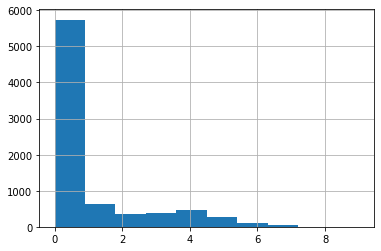

In [83]:
weather.bad_conditions.hist()

plt.show()

### Rating the Weather Conditions<a class="anchor" id="ratingweather"></a>

We previously counted the number of bad weather conditions of each day. Now, we are going to use the counts to create a rating system for the weather.

In [84]:
weather.bad_conditions.value_counts().sort_index()                # bad conditions by index

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [85]:
weather['rating'] = weather.bad_conditions.map(lambda 
                                               x: 'good' if x == 0 else('bad' if (1 <= x <= 4) else 'worse'))

                                               # converting:
                                               # 0 to 'good'
                                               # 1-4 to 'bad'
                                               # 5-9 to 'worse'

In [86]:
weather.rating.value_counts()                                     # counting ratings

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [87]:
cats = pd.api.types.CategoricalDtype(categories=['bad', 'worse', 'good'], ordered=True)

                                                                  # creating an ordered categorical data type

In [88]:
weather['rating'] = weather.rating.astype(cats)                   # changing the data type of weather['rating']

In [89]:
weather.rating.tail()

8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, dtype: category
Categories (3, object): ['bad' < 'worse' < 'good']

### Comparing Arrest Rates by Weather Rating<a class="anchor" id="weatherandarrestrate"></a>

#### Preparing the DataFrames<a class="anchor" id="dfprep"></a>

In [130]:
df.reset_index(inplace=True)                                       # resetting the index

In [131]:
weather_rating = weather[['DATE', 'rating']]                       # creating a new data frame

#### Merging the DataFrames<a class="anchor" id="dfmerge"></a>

In [132]:
df.shape                                                           # checking the dimensions

(480584, 30)

In [133]:
weather_rating = weather_rating.drop_duplicates(subset='DATE')     # dropping duplicates

In [134]:
weather_rating.reset_index(inplace=True)                           # resetting the index

In [135]:
weather_rating = weather_rating.drop('index', axis=1)              # dropping the former index

In [136]:
df_weather = pd.merge(left=df,
                      right=weather_rating,
                      left_on='stop_date',
                      right_on='DATE',
                      how='left')                                  # merging the data frames

In [137]:
df_weather.shape                                                   # rechecking the dimensions

(480584, 32)

In [138]:
df_weather

,level_0,index,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,...,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,combined,frisk,stop_minutes,DATE,rating
0,0,0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,...,False,0-15 Min,False,False,Zone K1,2005-01-02 01:55,True,8,2005-01-02,good
1,1,1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,...,False,16-30 Min,False,False,Zone X4,2005-01-02 20:30,True,23,2005-01-02,good
2,2,2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,...,False,0-15 Min,False,False,Zone X4,2005-01-04 12:55,True,8,2005-01-04,good
3,3,3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,...,False,0-15 Min,False,False,Zone X4,2005-01-06 01:30,True,8,2005-01-06,good
4,4,4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,0,...,False,30+ Min,True,False,Zone X1,2005-01-12 08:05,True,45,2005-01-12,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480579,480579,480579,2015-12-31 22:46:00,RI-2015-47061,2015-12-31,22:46,Zone X1,NaN,NaN,0.0,...,False,0-15 Min,True,False,Zone X1,2015-12-31 22:46,True,8,2015-12-31,good
480580,480580,480580,2015-12-31 22:47:00,RI-2015-47062,2015-12-31,22:47,Zone X4,NaN,NaN,500.0,...,False,0-15 Min,False,False,Zone X4,2015-12-31 22:47,True,8,2015-12-31,good
480581,480581,480581,2015-12-31 23:08:00,RI-2015-47063,2015-12-31,23:08,Zone X3,NaN,NaN,200.0,...,False,0-15 Min,False,False,Zone X3,2015-12-31 23:08,True,8,2015-12-31,good
480582,480582,480582,2015-12-31 23:44:00,RI-2015-47064,2015-12-31,23:44,Zone K2,NaN,NaN,900.0,...,False,0-15 Min,False,False,Zone K2,2015-12-31 23:44,True,8,2015-12-31,good


***

In [139]:
df_weather.is_arrested.mean()                   # calculating the overall arrest rate

0.03454755048024903

In [140]:
df_weather.groupby(['rating', 'violation']).mean().is_arrested

                                                # calculating the arrest rate for each of the weather ratings

rating  violation          
bad     Equipment              0.054348
        Moving violation       0.066667
        Other                  0.237288
        Registration/plates    0.017857
        Seat belt              0.000000
        Speeding               0.008850
worse   Equipment              0.083333
        Moving violation       0.030075
        Other                  0.069767
        Registration/plates    0.000000
        Seat belt                   NaN
        Speeding               0.009464
good    Equipment              0.060392
        Moving violation       0.057303
        Other                  0.079829
        Registration/plates    0.086129
        Seat belt              0.026836
        Speeding               0.013616
Name: is_arrested, dtype: float64

In [142]:
df_weather.groupby(['violation', 'rating']).mean().is_arrested

violation            rating
Equipment            bad       0.054348
                     worse     0.083333
                     good      0.060392
Moving violation     bad       0.066667
                     worse     0.030075
                     good      0.057303
Other                bad       0.237288
                     worse     0.069767
                     good      0.079829
Registration/plates  bad       0.017857
                     worse     0.000000
                     good      0.086129
Seat belt            bad       0.000000
                     worse          NaN
                     good      0.026836
Speeding             bad       0.008850
                     worse     0.009464
                     good      0.013616
Name: is_arrested, dtype: float64

In [143]:
arrest_rate = df_weather.groupby(['rating', 'violation']).mean().is_arrested

In [144]:
arrest_rate.loc['bad', 'Moving violation']     #  arrest rate for moving violations in bad weather

0.06666666666666667

In [145]:
arrest_rate.loc[:, 'Speeding']                 # arrest rates for speeding violations in all weather conditions

rating
bad      0.008850
worse    0.009464
good     0.013616
Name: is_arrested, dtype: float64

In [146]:
arrest_rate.unstack()                          # reshaping arrest_rate into a data frame using .unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
bad,0.054348,0.066667,0.237288,0.017857,0.000000,0.008850
worse,0.083333,0.030075,0.069767,0.000000,NaN,0.009464
good,0.060392,0.057303,0.079829,0.086129,0.026836,0.013616


In [147]:
pd.pivot_table(df_weather,                     # creating a pivot table
               index='rating',
               columns='violation',
               values='is_arrested')

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
rating,,,,,,
bad,0.054348,0.066667,0.237288,0.017857,0.000000,0.008850
worse,0.083333,0.030075,0.069767,0.000000,NaN,0.009464
good,0.060392,0.057303,0.079829,0.086129,0.026836,0.013616


## Summary<a class="anchor" id="summary"></a>

With the help of weather and traffic stop datasets we were able to unveil pretty interesting connections between the features.

### Conclusion<a class="anchor" id="conc"></a>

- Male and female drivers do not tend to commit different types of traffic violations.
- Gender does not have an impact on whether the driver will receive a ticket or a warning.
- The search rate for males is much higher than it is for females.
- Males are frisked more often than females which might mean that police officers consider males to be higher risk.
- When a driver gets stopped, they are more likely to get arrested at night.
- Drug-related stops are becoming more common over time.
- When a driver gets stopped for speeding, they are less likely to get arrested in bad weather conditions.